#### Install all libraries and prerequisites

In [1]:
# # tensorflow packages
# !pip install absl-py
# !pip install tensorflow
# !pip install tensorflow-hub
# # seaborn
# !pip install seaborn
# # ML
# !pip install scikit-learn
# # pytorch
# !pip install torch 
# # Hugging face
# !pip install transformers datasets

In [2]:
# # NLTK
# !pip install nltk

#### Load the libraries

In [3]:
# Normal packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

# Deep learning
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub

# Hugging face
from transformers import pipeline

# scikit-learn
from sklearn.cluster import KMeans

# NLP
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk

2024-05-06 11:26:10.651816: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 11:26:10.656970: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 11:26:10.719420: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 11:26:12.526148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/johnadi/Desktop/projects/projects-from-yt-channel-datamodelingxp/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonoteb

In [4]:
# Download some nltk required data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/johnadi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/johnadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Load the deep learning NLP models (pretrained)

In [5]:
# Universal sentence encoder (from Google)
USE_encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to use USE encoder
def embed(input):
    return np.array(USE_encoder(input))

2024-05-06 11:35:18.054852: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34133760 exceeds 10% of free system memory.
2024-05-06 11:35:18.080851: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34133760 exceeds 10% of free system memory.
2024-05-06 11:35:18.107314: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34133760 exceeds 10% of free system memory.
2024-05-06 11:35:18.132868: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34133760 exceeds 10% of free system memory.
2024-05-06 11:35:18.157624: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34133760 exceeds 10% of free system memory.


In [6]:
embedding = embed(["I have a lot of ideas that I have not yet shared with anyone"])

print(embedding.shape)

embedding

(1, 512)


array([[-0.03706404,  0.04637072, -0.0218052 , -0.03308216, -0.02650446,
         0.00412575,  0.02141904,  0.02810963, -0.05834313,  0.00772904,
         0.01461628,  0.05025283, -0.00400576,  0.07022206, -0.00195074,
        -0.05375752, -0.00067964,  0.03015116, -0.06145963,  0.00726615,
         0.03256594, -0.00130806,  0.02783514,  0.01409339,  0.01626939,
         0.00699508,  0.0644512 ,  0.04186974, -0.01191446,  0.0137765 ,
        -0.00758494, -0.03221684, -0.02540955, -0.03105837,  0.00236084,
         0.03418807,  0.01259917,  0.03323503, -0.0531241 ,  0.01981849,
        -0.03125674,  0.07108445, -0.01699221,  0.05838882,  0.03048337,
         0.03177406, -0.07886275, -0.03561032,  0.04167322, -0.04955426,
        -0.00784955, -0.00941378,  0.00356854, -0.06262928, -0.0002079 ,
         0.00750806, -0.03566537,  0.00934657, -0.02022422,  0.03098925,
        -0.07041349,  0.03076617,  0.01125549, -0.01449345, -0.02635142,
         0.06541081, -0.07497375, -0.02993498,  0.0

In [7]:
# Get sentiment model from hugging face platform
sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/johnadi/Desktop/projects/projects-from-yt-channel-datamodelingxp/env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [20]:
def sentiment(input):
    result = sentiment_model(input[:512])
    sign = 1 if (result[0]['label'] == "POSITIVE") else -1
    value = result[0]['score']
    score =  sign*value
    return score

sentiment("I do have the talent of speaking in public")

0.9984925985336304

##### Load the data

In [9]:
df = pd.read_csv("drugLibTrain_raw.tsv", sep="\t")
df.shape

(3107, 9)

In [10]:
df.sample(10)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
603,2086,accupril,9,Considerably Effective,No Side Effects,hypertension,lower blood pressure in combination with Hyzaar,None I am aware of.,Taken once daily in combination with Hyzaar. M...
2677,1855,augmentin,7,Highly Effective,Severe Side Effects,"sinusitis,quinsy",my throat was better. My headache started to ...,It was really hard for me to fall asleep durin...,I was taking 2 1000 mg tablets a tablets a day...
996,1493,metrogel,8,Considerably Effective,No Side Effects,roseasa,--reduced redness on face [especially around n...,I have not found any side affects as of yet.,Thin layer of Metrogel over affected areas of ...
2435,2227,allegra,9,Considerably Effective,No Side Effects,seasonal allergies,Helped reduce nasal discomforts from seasonal ...,I did not have any noticable side effects from...,I was to take this medication as needed to pre...
113,3469,ambien-cr,7,Highly Effective,Moderate Side Effects,insomnia,The benefits from the ambien CR were phenomina...,The negative side effects were the continued n...,12.5 mg for insomnia nightly
1605,2651,diclofenac,6,Highly Effective,Moderate Side Effects,pinched nerve from bulging disc & disseminated...,The pain was greatly diminished and I was able...,It caused my liver function tests to become el...,I was taken off the diclofenac to see if that ...
2323,757,flonase,10,Highly Effective,No Side Effects,chronic sinus infections,"I have had 1-2 sinus infections anually, compa...",I have no noticiable side effects,"2 sprays in each nostril, once daily"
2899,3317,dilantin,8,Moderately Effective,Mild Side Effects,seizures,to prevent seizures after being exposed to lea...,gum swelling,3 x a day
1165,3585,differin,5,Marginally Effective,Moderate Side Effects,acne,I haven't noticed too much of a difference so ...,I did not put it on near my eyes but somehow t...,My dermatologist prescribed this with a water ...
2330,424,imitrex,9,Considerably Effective,Mild Side Effects,migraine,Pain relief that was seen within 30 minutes. ...,Mild dizziness and a rushing feeling sometimes...,"As stated above, a 25 mg pill is taken at the ..."


In [11]:
# Look at only the side effects
sideEffectsReviews = df['sideEffectsReview'].dropna().tolist()

##### Create topic model

In [21]:
class ReviewsTopicModel:

    STOPWORDS = stopwords.words('english') # stopwords from nltk

    EMBEDDING_DIM = 512 # USE encoder

    # constructor 
    def __init__(self, reviews):
        self.X = self.clean(reviews)

    # clean text method
    def clean(self, reviews):
        # words to replace
        string_map = {'\r':'', '\n':'', '/': ' ', "'": "", '"':''}
        reviews_cleaned = reviews[:]
        for i in range(len(reviews_cleaned)):
            for s in string_map:
                reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower()
        # Transform the reviews into embeddings dataframe
        x = embed(reviews_cleaned)
        X = pd.DataFrame(x)
        X.index = reviews_cleaned
        return X
    
    # Method to determine the number of topics (a.k.a kmeans cluster number)
    def elbow_plot(self):
        cluster_sizes = list(range(1, 81))
        cluster_scores = []
        for n in cluster_sizes:
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(self.X)
            cluster_scores.append(kmeans.inertia_)
        plt.figure()
        plt.plot(cluster_sizes, cluster_scores)
        plt.show()

    # Method to create extract topics from text data
    def create_topics(self, num_topics):
        # cluster the reviews
        kmeans = KMeans(n_clusters=num_topics)
        kmeans.fit(self.X)

        # create final topics dataframe
        topics_df = self.X.copy()
        topics_df['topic'] = kmeans.labels_.copy()
        topics_df['topic'] = topics_df['topic'].astype(int)

        # Create summary keywords per topic
        topic_keywords = {}
        for topic in topics_df['topic'].unique():
            topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
            topic_centroid = kmeans.cluster_centers_[topic] # cluster center
            topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
        topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

        # Score the sentiment of each review
        topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

        # final result
        self.topics_keywords = topic_keywords
        self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]

    def get_closest_words(self, reviews, centroid):
        word_distances = {}
        for r in reviews:
            review_words = [w for w in word_tokenize(r) if (w not in self.STOPWORDS)]
            for w in review_words:
                word_embedding = embed([w])  # return 512 dimensional vector for the word 'w'
                # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
                word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
        # done collecting the distances of the words to the topics' center
        top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-5:]
        return ",".join([x[1] for x in top_5_keywords])
    
    def cosine_similarity(self, x, y):
        # x, y are both appropriate dimension
        x = x.reshape(self.EMBEDDING_DIM,)
        y = y.reshape(self.EMBEDDING_DIM,)
        # calculate cosine similarity
        dotproduct = x.dot(y)
        x_mag = x.dot(x)**0.5
        y_mag = y.dot(y)**0.5
        # returns closer to 1 if x and y are similar, closer to 0 if they are different
        return dotproduct/(x_mag * y_mag)

##### Initialize model

In [22]:
topic_model = ReviewsTopicModel(sideEffectsReviews)

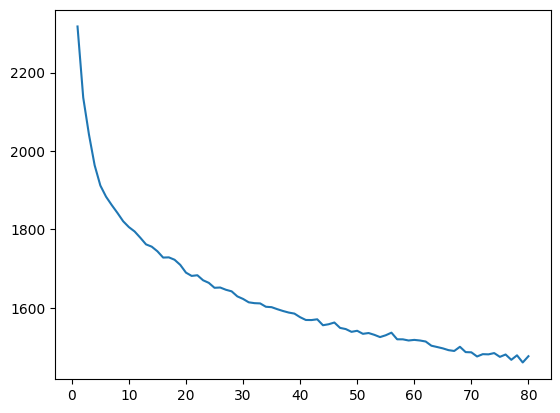

In [14]:
topic_model.elbow_plot() # going to use 40 clusters i.e 40 topics

##### Create final model and evaluate

In [23]:
topic_model.create_topics(num_topics=40)

In [24]:
topic_model.topics_df

,topic,topic_keywords,sentiment
"cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness",12,"sleepiness,sleepiness-,restlessness,depression...",-0.997240
"heavy cycle, cramps, hot flashes, fatigue, long lasting cycles. its only been 5 1 2 months, but im concidering changing to a different bc. this is my first time using any kind of bc, unfortunately due to the constant hassel, im not happy with the results.",27,"cyclen,tri-cyclen,menstruation,peri-menopause,...",-0.999278
heavier bleeding and clotting than normal.,27,"cyclen,tri-cyclen,menstruation,peri-menopause,...",-0.998727
"constipation, dry mouth and some mild dizziness that would go away after medication was stopped for a few days.",19,"diahrea,diareah,ibs,constipated,constipation",-0.998595
i felt extremely drugged and dopey. could not drive at all while on this med. also had extreme ankle and feet swelling and couldnt even wear shoes.,25,"osteoarthritis,lyrica,tendonitis,pains,fibromy...",-0.998701
...,...,...,...
"restless legs at night, insomnia, headache (sometimes pretty bad). also, make sure you take it and then start productive things, otherwise you attention will be focused on whatever you are doing when it starts to work, i.e. playing online games for hours.",10,"drowsy,drowsiness,insomnia,sleepiness,sleeples...",-0.995522
"weight gain, extreme tiredness during the day, insomnia at night, bad effect on libido and sexual ability. extreme lethargy.",1,"arousal,disfunction,impotence,erectile,libido",-0.999365
"constant issues with the patch not staying on. i called the manufacture (bayer), they took down the lot number and said we are sorry. they said they were going to send a new box to my local pharmacy at no charge. i have checked every week for the last three weeks and nothing! yeah, great way to follow through. throughout being on the patch i noticed large acne on my face, lack of energy, no libido, vaginal dryness, daily hot flashes and extreme moodiness (so sorry to my husband, even though he has been great through all of this). i know it has only been three months and my body is trying to adjust, but i just could not take it anymore. i contacted my gyn and he prescribed estratest. cross your fingers i hope it works!!!!",36,"itchy,rash,hives,rashes,itchiness",-0.999398
"dizziness, fatigue, nausea",5,"dizzyness,dizzy,lightheaded,lightheadedness,di...",-0.999686


In [27]:
topic_model.topics_df.query("topic == 35")

,topic,topic_keywords,sentiment
nausea for first two weeks then no perceived ill effects,35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.991112
"the patient felt mild headeaches, in addition there were mild symptoms of nausea",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.998874
"unfortunately, there were many side effects such as diarrhea, nausea, occasional vomiting, extreme fatigue, foggy mind. bruising at the injection site was also very common.",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.997994
there was one morning i only had an 80 calorie granola bar for breakfast and i took my dose and i ended up having terrible nausea. will never make that mistake again.,35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.995800
"nausea if taken on an empty stomach, shakiness, dry mouth.",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.999599
...,...,...,...
"on a few occasions, mild nausea immediately after taking the drug.",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.995971
"horrible horrible nausea for the first month or so. and i would vomit almost everyday, whether i ate something or not, it didnt matter, it was coming up. sometimes eatting something would help, and sometimes i actually didnt throw up. but if i didnt eat anything, then it was guarenteed i would be paying a visit to my good friend: the toilet. i would usually take my pill at 8 in the morning, and the nausea would finally end around 3pm. this happned everyday. but around month 2 is where it would be ok, till month three, where i would have light spotting, then it would get heavier and heavier till it was as if i was having a full blown period.",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.996120
"on the larger dosage of 20mg per day: dizziness, rapid heart rate, general feeling of nausea",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.993500
"nausea, vommiting, depression, vivid dreams, and nightmares. the vommiting came on within minutes of ingestion and my physician offered no other dosage or medication to alleviate the side effects.",35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.999137


In [29]:
topic_model.topics_keywords[30]

'stomach,stool,diarrhea,constipated,constipation'

##### Look at average sentiment per topic

In [33]:
topic_model.topics_df.groupby(['topic', 'topic_keywords']).agg({'sentiment': 'mean'}).reset_index().sort_values(by='sentiment')

,topic,topic_keywords,sentiment
35,35,"nauseas,nauseous,nauseated,nausea,nausea-",-0.996281
3,3,"really,far,whatsoever,nil,none",-0.985950
17,17,"sinuses,sores,jittery,mouth,dryness",-0.982473
21,21,"palpitations,pain,numbness,tramadol,pains",-0.952526
5,5,"dizzyness,dizzy,lightheaded,lightheadedness,di...",-0.930041
18,18,"vaginal,vaginitis,yeast,thrush,diflucan",-0.929316
33,33,"cognitive,remembering,recollection,alzheimers,...",-0.916387
26,26,"laxitive,nsaid,nauseated,side-effects,nexium",-0.916105
24,24,"insomnia,drowsy,sleeplessness,drowsiness,sleep...",-0.910606
12,12,"sleepiness,sleepiness-,restlessness,depression...",-0.906707


In [36]:
topic_model.topics_df.query("topic == 6")

,topic,topic_keywords,sentiment
there were no side effects,6,"noticed,drug,medication,effect,effects",0.521258
there was no side effects to this treatment.,6,"noticed,drug,medication,effect,effects",0.871121
no negative side effects were experienced.,6,"noticed,drug,medication,effect,effects",0.990023
there were no side effects that i was aware of,6,"noticed,drug,medication,effect,effects",-0.971223
there were not any side effects.,6,"noticed,drug,medication,effect,effects",-0.984691
there were no side effects noticed with this medication.,6,"noticed,drug,medication,effect,effects",-0.993992
there were no side effects noticed,6,"noticed,drug,medication,effect,effects",-0.996566
no treatment side effects were noticed.,6,"noticed,drug,medication,effect,effects",-0.998854
there were no side effects.,6,"noticed,drug,medication,effect,effects",0.894721
the patient did not experience any side effects,6,"noticed,drug,medication,effect,effects",-0.994515
